In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud

# Análisis

In [3]:
info_vuelos = pd.read_pickle('pkl/info_vuelos.pkl')
info_vuelos = info_vuelos.drop(columns=['vuelo', 'terminal_salida', 'puerta_salida', 'terminal_llegada', 'puerta_llegada'])
info_vuelos.sample(10)

,aerolinea,origen,destino,fecha_salida,horario_salida,fecha_llegada,horario_llegada
150858,Korean Air,Seúl Incheon,Tokio Narita,"[domingo, 17, marzo]",17:40,"[domingo, 17, marzo]",20:36
28,Georgian Airways,Tel Aviv,Tiflis,"[jueves, 7, marzo]",08:40,"[jueves, 7, marzo]",13:10
13198,American,Los Ángeles,Miami,"[sabado, 9, marzo]",17:05,"[domingo, 10, marzo]",19:00
195968,Tianjin Airlines,Xi'an,Tianjin,"[lunes, 18, marzo]",09:15,"[lunes, 18, marzo]",16:00
59170,Avianca,Bogotá,Cali,"[jueves, 14, marzo]",09:45,"[jueves, 14, marzo]",11:05
193567,KLM,Rochester,Atlanta,"[sabado, 16, marzo]",17:40,"[sabado, 16, marzo]",19:20
19010,American,Chicago O'Hare,Wausau,"[domingo, 10, marzo]",08:19,"[domingo, 10, marzo]",09:22
193576,RwandAir WB 210,Brazzaville,Duala,"[miercoles, 20, marzo]",21:20,"[miercoles, 20, marzo]",23:40
119621,Delta,Orlando Intl,Atlanta,"[viernes, 15, marzo]",06:35,"[viernes, 15, marzo]",07:58
102748,China Southern,Urumchi,Taskent,"[jueves, 14, marzo]",09:05,"[jueves, 14, marzo]",12:10


In [4]:
info_vuelos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344124 entries, 0 to 196239
Data columns (total 7 columns):
aerolinea          344124 non-null object
origen             344124 non-null object
destino            344124 non-null object
fecha_salida       344124 non-null object
horario_salida     344124 non-null object
fecha_llegada      344124 non-null object
horario_llegada    344124 non-null object
dtypes: object(7)
memory usage: 21.0+ MB


### Top 10: aerolineas con mayor cantidad de vuelos en marzo

/home/rodrigo/.local/lib/python3.6/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


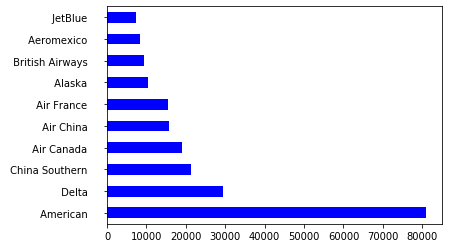

In [5]:
info_vuelos['aerolinea'].value_counts().head(10).plot(kind='barh', colors=['b'])

### Dias vs horas en la que salen vuelos

In [9]:
dias = info_vuelos['fecha_salida'].apply(lambda row: row[0]).tolist()
hora = info_vuelos['horario_salida'].apply(lambda row: row.split(':')[0]).tolist()
d = {'dias': dias, 'hora': hora}
d = pd.DataFrame(data=d)
d = pd.get_dummies(d.dias).groupby(d.hora).apply(sum)
d

,domingo,jueves,lunes,martes,miercoles,sabado,viernes
hora,,,,,,,
00,282,403,167,340,326,232,392
01,241,367,178,269,254,164,266
02,198,322,114,259,259,149,296
03,123,216,66,146,163,107,201
04,149,312,101,196,198,116,273
05,801,1388,386,709,776,673,1206
06,2279,3553,1444,2393,2554,1798,3289
07,2710,4196,1847,3057,3195,2103,3641
08,2848,4462,1850,3158,3305,2147,3653


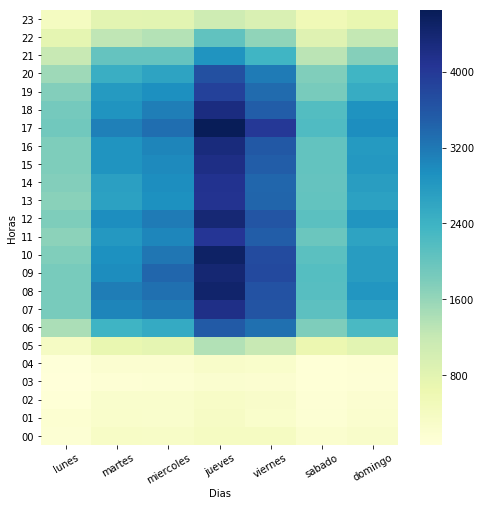

In [40]:
dias = info_vuelos['fecha_salida'].apply(lambda row: row[0]).tolist()
hora = info_vuelos['horario_salida'].apply(lambda row: row.split(':')[0]).tolist()
d = {'dias': dias, 'hora': hora}
d = pd.DataFrame(data=d)
d = pd.get_dummies(d.dias).groupby(d.hora).apply(sum)
d = d[['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo']]
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(d, cmap="YlGnBu", yticklabels=True)
ax.invert_yaxis()
ax.set(xlabel='Dias', ylabel='Horas')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

### Destinos mas frecuentes

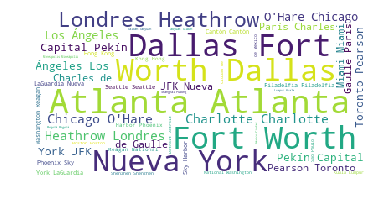

In [41]:
d = info_vuelos['destino'].values.tolist()
text = " ".join(d)
# Generate a word cloud image
wordcloud = WordCloud().generate(text)
# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=50 ,max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Exporto el pkl a csv

In [52]:
# Elimino espacios
info_vuelos['aerolinea'] = info_vuelos['aerolinea'].apply(lambda x: x.strip())
info_vuelos['origen'] = info_vuelos['origen'].apply(lambda x: x.strip())
info_vuelos['destino'] = info_vuelos['destino'].apply(lambda x: x.strip())
info_vuelos.sample(10)

,aerolinea,origen,destino,fecha_salida,horario_salida,fecha_llegada,horario_llegada
178123,LATAM,Santiago de Chile,Miami,"[martes, 19, marzo]",10:15,"[miercoles, 20, marzo]",11:35
166029,United,San Francisco,Phoenix Sky Harbor,"[miercoles, 20, marzo]",07:15,"[miercoles, 20, marzo]",08:00
28488,Air Canada,San Francisco,Toronto Pearson,"[domingo, 10, marzo]",09:45,"[lunes, 11, marzo]",10:55
133286,TAME,Esmeraldas,Cali,"[miercoles, 13, marzo]",09:31,"[miercoles, 13, marzo]",12:28
91117,COPA,Panamá,Medellín,"[martes, 12, marzo]",06:16,"[martes, 12, marzo]",07:54
29532,Air Canada,Moncton,Ottawa,"[domingo, 10, marzo]",16:40,"[domingo, 10, marzo]",17:27
27349,Air Canada,Denver,Vancouver,"[jueves, 7, marzo]",14:05,"[jueves, 7, marzo]",15:30
100576,China Southern,Shanghái Hongqiao,Cantón,"[martes, 12, marzo]",15:20,"[martes, 12, marzo]",19:57
112175,Delta,Washington Reagan National,Nueva York JFK,"[viernes, 15, marzo]",09:25,"[viernes, 15, marzo]",10:40
117777,Delta,Los Ángeles,Kahului,"[viernes, 15, marzo]",18:00,"[viernes, 15, marzo]",19:36


Exporto la informacion completa para luego llevarla al Neo4j

In [53]:
info_vuelos.to_csv('csv/info_vuelos.csv', index = None, header = True)

Exporto solo origen y destino para luego obtener sus IATA codes en pgAdmin

In [57]:
origen_destino = info_vuelos[['origen', 'destino']]
origen_destino.to_csv('csv/origen_destino.csv', index = None, header = True, sep = ';')